## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.91773 | train_mse: 0.56545 | train_mae: 0.60196 |  0:00:01s


epoch 1  | loss: 0.33597 | train_mse: 0.39879 | train_mae: 0.4798  |  0:00:02s


epoch 2  | loss: 0.20717 | train_mse: 0.19422 | train_mae: 0.34588 |  0:00:03s


epoch 3  | loss: 0.16636 | train_mse: 0.11603 | train_mae: 0.2638  |  0:00:05s


epoch 4  | loss: 0.14999 | train_mse: 0.08665 | train_mae: 0.23411 |  0:00:07s


epoch 5  | loss: 0.1156  | train_mse: 0.07957 | train_mae: 0.22482 |  0:00:07s


epoch 6  | loss: 0.1227  | train_mse: 0.07516 | train_mae: 0.21273 |  0:00:08s


epoch 7  | loss: 0.11123 | train_mse: 0.09381 | train_mae: 0.23471 |  0:00:09s


epoch 8  | loss: 0.0907  | train_mse: 0.05643 | train_mae: 0.18633 |  0:00:10s


epoch 9  | loss: 0.10413 | train_mse: 0.05942 | train_mae: 0.1792  |  0:00:11s


epoch 10 | loss: 0.09328 | train_mse: 0.06023 | train_mae: 0.18787 |  0:00:13s


epoch 11 | loss: 0.10135 | train_mse: 0.049   | train_mae: 0.1754  |  0:00:15s


epoch 12 | loss: 0.09996 | train_mse: 0.06008 | train_mae: 0.18767 |  0:00:16s


epoch 13 | loss: 0.09238 | train_mse: 0.07251 | train_mae: 0.22578 |  0:00:17s


epoch 14 | loss: 0.09217 | train_mse: 0.04293 | train_mae: 0.15722 |  0:00:18s


epoch 15 | loss: 0.07929 | train_mse: 0.0519  | train_mae: 0.16567 |  0:00:20s


epoch 16 | loss: 0.07443 | train_mse: 0.05231 | train_mae: 0.17316 |  0:00:21s


epoch 17 | loss: 0.07576 | train_mse: 0.0409  | train_mae: 0.15199 |  0:00:22s


epoch 18 | loss: 0.0941  | train_mse: 0.033   | train_mae: 0.13752 |  0:00:23s


epoch 19 | loss: 0.08522 | train_mse: 0.03371 | train_mae: 0.14552 |  0:00:25s


epoch 20 | loss: 0.06599 | train_mse: 0.03104 | train_mae: 0.13682 |  0:00:27s


epoch 21 | loss: 0.07961 | train_mse: 0.02824 | train_mae: 0.13493 |  0:00:29s


epoch 22 | loss: 0.05629 | train_mse: 0.02684 | train_mae: 0.13436 |  0:00:30s


epoch 23 | loss: 0.05381 | train_mse: 0.02066 | train_mae: 0.11214 |  0:00:31s


epoch 24 | loss: 0.06772 | train_mse: 0.03999 | train_mae: 0.13861 |  0:00:32s


epoch 25 | loss: 0.06438 | train_mse: 0.02531 | train_mae: 0.12178 |  0:00:34s


epoch 26 | loss: 0.05073 | train_mse: 0.02184 | train_mae: 0.11562 |  0:00:36s


epoch 27 | loss: 0.05864 | train_mse: 0.01899 | train_mae: 0.10974 |  0:00:37s


epoch 28 | loss: 0.06085 | train_mse: 0.02519 | train_mae: 0.12429 |  0:00:38s


epoch 29 | loss: 0.04271 | train_mse: 0.0168  | train_mae: 0.10386 |  0:00:39s


epoch 30 | loss: 0.03678 | train_mse: 0.01801 | train_mae: 0.10706 |  0:00:40s


epoch 31 | loss: 0.04753 | train_mse: 0.02941 | train_mae: 0.14062 |  0:00:41s


epoch 32 | loss: 0.06207 | train_mse: 0.02001 | train_mae: 0.11166 |  0:00:42s


epoch 33 | loss: 0.04856 | train_mse: 0.02329 | train_mae: 0.11916 |  0:00:44s


epoch 34 | loss: 0.0446  | train_mse: 0.01867 | train_mae: 0.10921 |  0:00:45s


epoch 35 | loss: 0.04599 | train_mse: 0.02532 | train_mae: 0.12384 |  0:00:47s


epoch 36 | loss: 0.0442  | train_mse: 0.01668 | train_mae: 0.10651 |  0:00:48s


epoch 37 | loss: 0.02241 | train_mse: 0.01125 | train_mae: 0.08506 |  0:00:49s


epoch 38 | loss: 0.03953 | train_mse: 0.02364 | train_mae: 0.11782 |  0:00:50s


epoch 39 | loss: 0.05422 | train_mse: 0.02282 | train_mae: 0.10917 |  0:00:51s


epoch 40 | loss: 0.0445  | train_mse: 0.02796 | train_mae: 0.11652 |  0:00:52s


epoch 41 | loss: 0.04691 | train_mse: 0.01951 | train_mae: 0.11148 |  0:00:53s


epoch 42 | loss: 0.04436 | train_mse: 0.01555 | train_mae: 0.09452 |  0:00:53s


epoch 43 | loss: 0.04501 | train_mse: 0.01904 | train_mae: 0.10681 |  0:00:54s


epoch 44 | loss: 0.05191 | train_mse: 0.01584 | train_mae: 0.09948 |  0:00:56s


epoch 45 | loss: 0.03946 | train_mse: 0.0243  | train_mae: 0.11956 |  0:00:56s


epoch 46 | loss: 0.0417  | train_mse: 0.03535 | train_mae: 0.14502 |  0:00:58s


epoch 47 | loss: 0.03334 | train_mse: 0.02713 | train_mae: 0.12504 |  0:00:59s


epoch 48 | loss: 0.04469 | train_mse: 0.01414 | train_mae: 0.09619 |  0:01:00s


epoch 49 | loss: 0.0333  | train_mse: 0.00919 | train_mae: 0.07641 |  0:01:01s


epoch 50 | loss: 0.05278 | train_mse: 0.01841 | train_mae: 0.11019 |  0:01:03s


epoch 51 | loss: 0.03522 | train_mse: 0.02205 | train_mae: 0.11819 |  0:01:04s


epoch 52 | loss: 0.03837 | train_mse: 0.0175  | train_mae: 0.09838 |  0:01:05s


epoch 53 | loss: 0.0323  | train_mse: 0.01192 | train_mae: 0.08381 |  0:01:06s


epoch 54 | loss: 0.0305  | train_mse: 0.01367 | train_mae: 0.09697 |  0:01:06s


epoch 55 | loss: 0.0389  | train_mse: 0.01682 | train_mae: 0.09031 |  0:01:08s


epoch 56 | loss: 0.04411 | train_mse: 0.01202 | train_mae: 0.08482 |  0:01:09s


epoch 57 | loss: 0.03726 | train_mse: 0.01691 | train_mae: 0.10656 |  0:01:10s


epoch 58 | loss: 0.03051 | train_mse: 0.00931 | train_mae: 0.07492 |  0:01:11s


epoch 59 | loss: 0.03035 | train_mse: 0.0197  | train_mae: 0.10696 |  0:01:12s


epoch 60 | loss: 0.04162 | train_mse: 0.01451 | train_mae: 0.0958  |  0:01:14s


epoch 61 | loss: 0.03527 | train_mse: 0.0095  | train_mae: 0.08055 |  0:01:15s


epoch 62 | loss: 0.03344 | train_mse: 0.01494 | train_mae: 0.09539 |  0:01:16s


epoch 63 | loss: 0.03779 | train_mse: 0.0176  | train_mae: 0.10755 |  0:01:18s


epoch 64 | loss: 0.02153 | train_mse: 0.00884 | train_mae: 0.076   |  0:01:19s


epoch 65 | loss: 0.02197 | train_mse: 0.00895 | train_mae: 0.07449 |  0:01:19s


epoch 66 | loss: 0.02261 | train_mse: 0.01095 | train_mae: 0.08087 |  0:01:20s


epoch 67 | loss: 0.0264  | train_mse: 0.01033 | train_mae: 0.07439 |  0:01:21s


epoch 68 | loss: 0.02608 | train_mse: 0.00948 | train_mae: 0.07973 |  0:01:22s


epoch 69 | loss: 0.03226 | train_mse: 0.02103 | train_mae: 0.11423 |  0:01:23s


epoch 70 | loss: 0.04654 | train_mse: 0.0138  | train_mae: 0.08656 |  0:01:24s


epoch 71 | loss: 0.03363 | train_mse: 0.01213 | train_mae: 0.08201 |  0:01:26s


epoch 72 | loss: 0.02173 | train_mse: 0.01644 | train_mae: 0.09725 |  0:01:28s


epoch 73 | loss: 0.0176  | train_mse: 0.01371 | train_mae: 0.09183 |  0:01:29s


epoch 74 | loss: 0.02457 | train_mse: 0.01099 | train_mae: 0.07856 |  0:01:29s


epoch 75 | loss: 0.01889 | train_mse: 0.00957 | train_mae: 0.0816  |  0:01:30s


epoch 76 | loss: 0.02748 | train_mse: 0.01671 | train_mae: 0.09857 |  0:01:31s


epoch 77 | loss: 0.02497 | train_mse: 0.02448 | train_mae: 0.12473 |  0:01:32s


epoch 78 | loss: 0.02537 | train_mse: 0.02095 | train_mae: 0.10409 |  0:01:34s


epoch 79 | loss: 0.03508 | train_mse: 0.01525 | train_mae: 0.09442 |  0:01:35s


epoch 80 | loss: 0.02387 | train_mse: 0.01323 | train_mae: 0.08992 |  0:01:35s


epoch 81 | loss: 0.02607 | train_mse: 0.01523 | train_mae: 0.09947 |  0:01:36s


epoch 82 | loss: 0.04671 | train_mse: 0.01509 | train_mae: 0.09801 |  0:01:37s


epoch 83 | loss: 0.03768 | train_mse: 0.02464 | train_mae: 0.12509 |  0:01:38s


epoch 84 | loss: 0.03398 | train_mse: 0.01968 | train_mae: 0.11324 |  0:01:39s


epoch 85 | loss: 0.04197 | train_mse: 0.01932 | train_mae: 0.11395 |  0:01:41s


epoch 86 | loss: 0.03694 | train_mse: 0.01279 | train_mae: 0.09045 |  0:01:42s


epoch 87 | loss: 0.03285 | train_mse: 0.01649 | train_mae: 0.10295 |  0:01:44s


epoch 88 | loss: 0.02586 | train_mse: 0.01297 | train_mae: 0.08712 |  0:01:46s


epoch 89 | loss: 0.03346 | train_mse: 0.01037 | train_mae: 0.0828  |  0:01:47s


epoch 90 | loss: 0.02777 | train_mse: 0.01058 | train_mae: 0.08273 |  0:01:49s


epoch 91 | loss: 0.02642 | train_mse: 0.01081 | train_mae: 0.08506 |  0:01:50s


epoch 92 | loss: 0.02439 | train_mse: 0.01363 | train_mae: 0.09088 |  0:01:51s


epoch 93 | loss: 0.02741 | train_mse: 0.01013 | train_mae: 0.06967 |  0:01:52s


epoch 94 | loss: 0.03347 | train_mse: 0.00972 | train_mae: 0.06862 |  0:01:52s


epoch 95 | loss: 0.02878 | train_mse: 0.01295 | train_mae: 0.08025 |  0:01:53s


epoch 96 | loss: 0.02548 | train_mse: 0.01066 | train_mae: 0.07663 |  0:01:54s


epoch 97 | loss: 0.0221  | train_mse: 0.01854 | train_mae: 0.10567 |  0:01:54s


epoch 98 | loss: 0.03188 | train_mse: 0.00869 | train_mae: 0.07758 |  0:01:56s


epoch 99 | loss: 0.03112 | train_mse: 0.0089  | train_mae: 0.07156 |  0:01:57s


epoch 100| loss: 0.03781 | train_mse: 0.01709 | train_mae: 0.09991 |  0:01:58s


epoch 101| loss: 0.0398  | train_mse: 0.01447 | train_mae: 0.09228 |  0:01:59s


epoch 102| loss: 0.02975 | train_mse: 0.01873 | train_mae: 0.10496 |  0:02:00s


epoch 103| loss: 0.03806 | train_mse: 0.01974 | train_mae: 0.10761 |  0:02:02s


epoch 104| loss: 0.03808 | train_mse: 0.01547 | train_mae: 0.09736 |  0:02:03s


epoch 105| loss: 0.02809 | train_mse: 0.00732 | train_mae: 0.06769 |  0:02:04s


epoch 106| loss: 0.01891 | train_mse: 0.00929 | train_mae: 0.07787 |  0:02:05s


epoch 107| loss: 0.02094 | train_mse: 0.00707 | train_mae: 0.06407 |  0:02:06s


epoch 108| loss: 0.02131 | train_mse: 0.00952 | train_mae: 0.07542 |  0:02:07s


epoch 109| loss: 0.0254  | train_mse: 0.01018 | train_mae: 0.07982 |  0:02:09s


epoch 110| loss: 0.02284 | train_mse: 0.01309 | train_mae: 0.08634 |  0:02:10s


epoch 111| loss: 0.02556 | train_mse: 0.00925 | train_mae: 0.07487 |  0:02:11s


epoch 112| loss: 0.02751 | train_mse: 0.02256 | train_mae: 0.11155 |  0:02:12s


epoch 113| loss: 0.02698 | train_mse: 0.01408 | train_mae: 0.08837 |  0:02:13s


epoch 114| loss: 0.04197 | train_mse: 0.01119 | train_mae: 0.08059 |  0:02:15s


epoch 115| loss: 0.02381 | train_mse: 0.01245 | train_mae: 0.07853 |  0:02:16s


epoch 116| loss: 0.02981 | train_mse: 0.0336  | train_mae: 0.1188  |  0:02:17s


epoch 117| loss: 0.02709 | train_mse: 0.0067  | train_mae: 0.06265 |  0:02:17s


epoch 118| loss: 0.02327 | train_mse: 0.00776 | train_mae: 0.06474 |  0:02:18s


epoch 119| loss: 0.02898 | train_mse: 0.01183 | train_mae: 0.08635 |  0:02:19s


epoch 120| loss: 0.02404 | train_mse: 0.00831 | train_mae: 0.06963 |  0:02:20s


epoch 121| loss: 0.02014 | train_mse: 0.00983 | train_mae: 0.07602 |  0:02:21s


epoch 122| loss: 0.03685 | train_mse: 0.01473 | train_mae: 0.08974 |  0:02:23s


epoch 123| loss: 0.02624 | train_mse: 0.0104  | train_mae: 0.08065 |  0:02:24s


epoch 124| loss: 0.02144 | train_mse: 0.00906 | train_mae: 0.07963 |  0:02:25s


epoch 125| loss: 0.02056 | train_mse: 0.01058 | train_mae: 0.07896 |  0:02:26s


epoch 126| loss: 0.02058 | train_mse: 0.00958 | train_mae: 0.08069 |  0:02:26s


epoch 127| loss: 0.02518 | train_mse: 0.00919 | train_mae: 0.07134 |  0:02:27s


epoch 128| loss: 0.02674 | train_mse: 0.00656 | train_mae: 0.06688 |  0:02:28s


epoch 129| loss: 0.01868 | train_mse: 0.00688 | train_mae: 0.06555 |  0:02:29s


epoch 130| loss: 0.01867 | train_mse: 0.00983 | train_mae: 0.07484 |  0:02:30s


epoch 131| loss: 0.01927 | train_mse: 0.00999 | train_mae: 0.07503 |  0:02:31s


epoch 132| loss: 0.02345 | train_mse: 0.01268 | train_mae: 0.08445 |  0:02:31s


epoch 133| loss: 0.02263 | train_mse: 0.0071  | train_mae: 0.06759 |  0:02:33s


epoch 134| loss: 0.02894 | train_mse: 0.00602 | train_mae: 0.06049 |  0:02:33s


epoch 135| loss: 0.0234  | train_mse: 0.00498 | train_mae: 0.05831 |  0:02:34s


epoch 136| loss: 0.01901 | train_mse: 0.00757 | train_mae: 0.06918 |  0:02:36s


epoch 137| loss: 0.03341 | train_mse: 0.01746 | train_mae: 0.08955 |  0:02:38s


epoch 138| loss: 0.02767 | train_mse: 0.01078 | train_mae: 0.07806 |  0:02:39s


epoch 139| loss: 0.03199 | train_mse: 0.00933 | train_mae: 0.07325 |  0:02:41s


epoch 140| loss: 0.02106 | train_mse: 0.00704 | train_mae: 0.06373 |  0:02:43s


epoch 141| loss: 0.01847 | train_mse: 0.00825 | train_mae: 0.0703  |  0:02:46s


epoch 142| loss: 0.02084 | train_mse: 0.00699 | train_mae: 0.0644  |  0:02:49s


epoch 143| loss: 0.02048 | train_mse: 0.00759 | train_mae: 0.0687  |  0:02:50s


epoch 144| loss: 0.02022 | train_mse: 0.00636 | train_mae: 0.06207 |  0:02:51s


epoch 145| loss: 0.01443 | train_mse: 0.00705 | train_mae: 0.06647 |  0:02:53s


epoch 146| loss: 0.01799 | train_mse: 0.00611 | train_mae: 0.05815 |  0:02:55s


epoch 147| loss: 0.02567 | train_mse: 0.00717 | train_mae: 0.06637 |  0:02:58s


epoch 148| loss: 0.02096 | train_mse: 0.01175 | train_mae: 0.08655 |  0:02:59s


epoch 149| loss: 0.02088 | train_mse: 0.01309 | train_mae: 0.08695 |  0:03:00s


epoch 150| loss: 0.02223 | train_mse: 0.01094 | train_mae: 0.0868  |  0:03:01s


epoch 151| loss: 0.02459 | train_mse: 0.0089  | train_mae: 0.07406 |  0:03:03s


epoch 152| loss: 0.02419 | train_mse: 0.01099 | train_mae: 0.08787 |  0:03:04s


epoch 153| loss: 0.03032 | train_mse: 0.01639 | train_mae: 0.10249 |  0:03:06s


epoch 154| loss: 0.03092 | train_mse: 0.03048 | train_mae: 0.12987 |  0:03:07s


epoch 155| loss: 0.02324 | train_mse: 0.01184 | train_mae: 0.08569 |  0:03:09s


epoch 156| loss: 0.01486 | train_mse: 0.01026 | train_mae: 0.07064 |  0:03:10s


epoch 157| loss: 0.02955 | train_mse: 0.01012 | train_mae: 0.08058 |  0:03:12s


epoch 158| loss: 0.03309 | train_mse: 0.00705 | train_mae: 0.06073 |  0:03:13s


epoch 159| loss: 0.02297 | train_mse: 0.01067 | train_mae: 0.08827 |  0:03:14s


epoch 160| loss: 0.02061 | train_mse: 0.01994 | train_mae: 0.11861 |  0:03:16s


epoch 161| loss: 0.01965 | train_mse: 0.01209 | train_mae: 0.09196 |  0:03:19s


epoch 162| loss: 0.02468 | train_mse: 0.00532 | train_mae: 0.05848 |  0:03:22s


epoch 163| loss: 0.02211 | train_mse: 0.00696 | train_mae: 0.06851 |  0:03:24s


epoch 164| loss: 0.0222  | train_mse: 0.01037 | train_mae: 0.08423 |  0:03:25s


epoch 165| loss: 0.0199  | train_mse: 0.00859 | train_mae: 0.06815 |  0:03:26s


epoch 166| loss: 0.01898 | train_mse: 0.00808 | train_mae: 0.06746 |  0:03:27s


epoch 167| loss: 0.02267 | train_mse: 0.01116 | train_mae: 0.07721 |  0:03:29s


epoch 168| loss: 0.01997 | train_mse: 0.01242 | train_mae: 0.08839 |  0:03:30s


epoch 169| loss: 0.01998 | train_mse: 0.01361 | train_mae: 0.09624 |  0:03:32s


epoch 170| loss: 0.02143 | train_mse: 0.00677 | train_mae: 0.06641 |  0:03:33s


epoch 171| loss: 0.0331  | train_mse: 0.0166  | train_mae: 0.10122 |  0:03:34s


epoch 172| loss: 0.02829 | train_mse: 0.00717 | train_mae: 0.06878 |  0:03:35s


epoch 173| loss: 0.02535 | train_mse: 0.00866 | train_mae: 0.07544 |  0:03:36s


epoch 174| loss: 0.01975 | train_mse: 0.00654 | train_mae: 0.06708 |  0:03:37s


epoch 175| loss: 0.02682 | train_mse: 0.00918 | train_mae: 0.07365 |  0:03:38s


epoch 176| loss: 0.03386 | train_mse: 0.00772 | train_mae: 0.06544 |  0:03:39s


epoch 177| loss: 0.0296  | train_mse: 0.02314 | train_mae: 0.11716 |  0:03:40s


epoch 178| loss: 0.01824 | train_mse: 0.01462 | train_mae: 0.09145 |  0:03:41s


epoch 179| loss: 0.02222 | train_mse: 0.01532 | train_mae: 0.08765 |  0:03:41s


epoch 180| loss: 0.02503 | train_mse: 0.00979 | train_mae: 0.07438 |  0:03:42s


epoch 181| loss: 0.02258 | train_mse: 0.00794 | train_mae: 0.06543 |  0:03:42s


epoch 182| loss: 0.02754 | train_mse: 0.00576 | train_mae: 0.05997 |  0:03:44s


epoch 183| loss: 0.02627 | train_mse: 0.00717 | train_mae: 0.06787 |  0:03:45s


epoch 184| loss: 0.02111 | train_mse: 0.00582 | train_mae: 0.05834 |  0:03:47s


epoch 185| loss: 0.02639 | train_mse: 0.00983 | train_mae: 0.08247 |  0:03:49s


epoch 186| loss: 0.01789 | train_mse: 0.00647 | train_mae: 0.06407 |  0:03:50s


epoch 187| loss: 0.02314 | train_mse: 0.00915 | train_mae: 0.07723 |  0:03:51s


epoch 188| loss: 0.02084 | train_mse: 0.00842 | train_mae: 0.07367 |  0:03:52s


epoch 189| loss: 0.04059 | train_mse: 0.0093  | train_mae: 0.07592 |  0:03:52s


epoch 190| loss: 0.02171 | train_mse: 0.00701 | train_mae: 0.06549 |  0:03:53s


epoch 191| loss: 0.01754 | train_mse: 0.01053 | train_mae: 0.08351 |  0:03:53s


epoch 192| loss: 0.02058 | train_mse: 0.00676 | train_mae: 0.06324 |  0:03:54s


epoch 193| loss: 0.02051 | train_mse: 0.00704 | train_mae: 0.06867 |  0:03:54s


epoch 194| loss: 0.02169 | train_mse: 0.0074  | train_mae: 0.06892 |  0:03:55s


epoch 195| loss: 0.01433 | train_mse: 0.00737 | train_mae: 0.06992 |  0:03:55s


epoch 196| loss: 0.02283 | train_mse: 0.00779 | train_mae: 0.07084 |  0:03:56s

Early stopping occurred at epoch 196 with best_epoch = 146 and best_train_mae = 0.05815
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.06416810912138557


ABC Pre-generator MAE 0.06521916520968


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

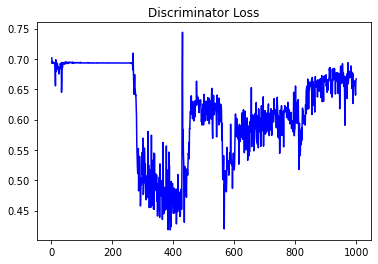

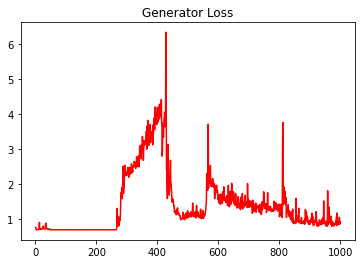

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.0429384884596258


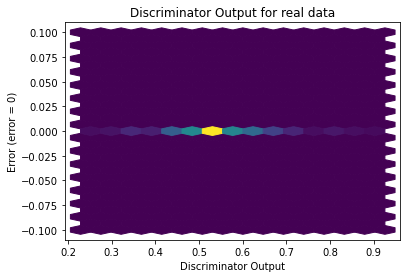

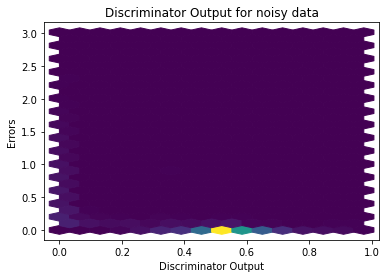

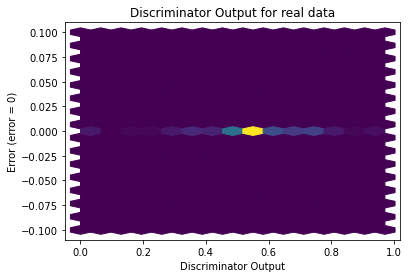

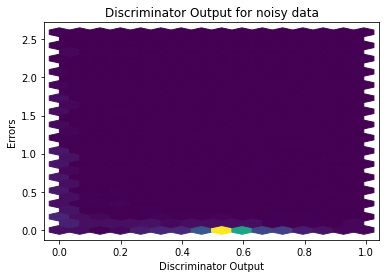

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

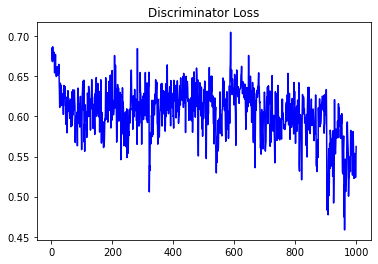

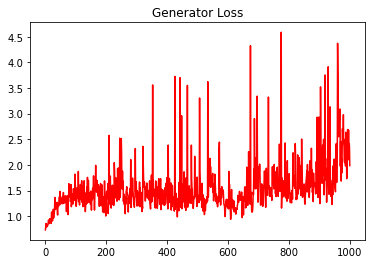

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.08404952415204668


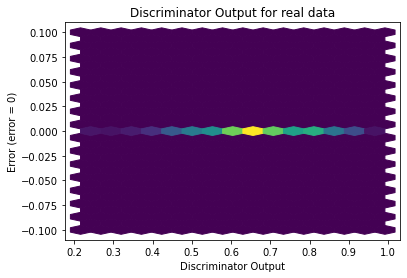

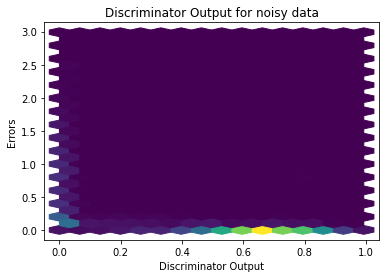

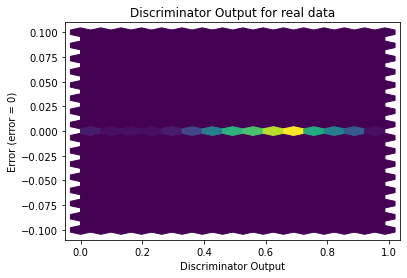

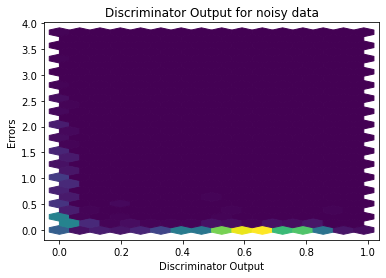

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


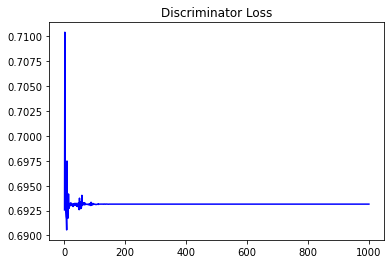

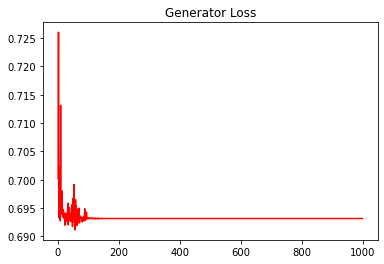

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.10344780373495895


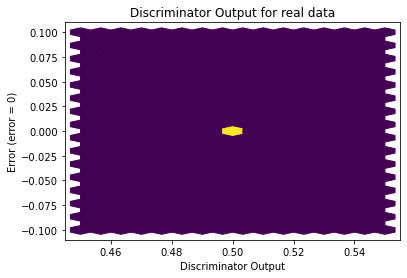

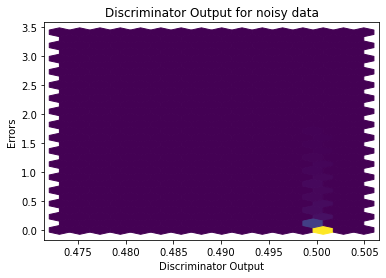

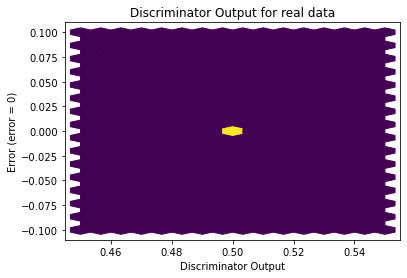

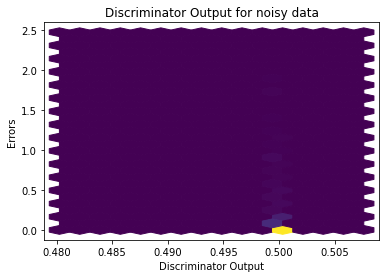

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


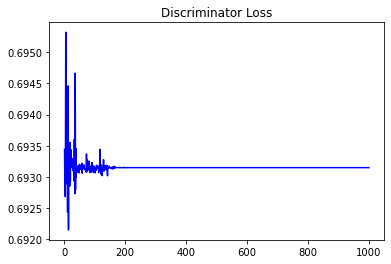

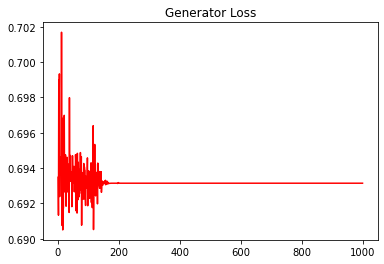

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.05916813216559202


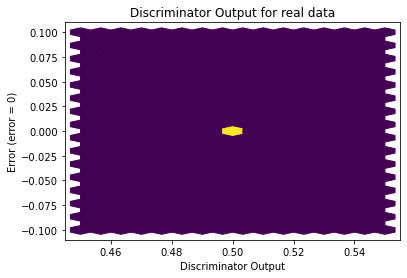

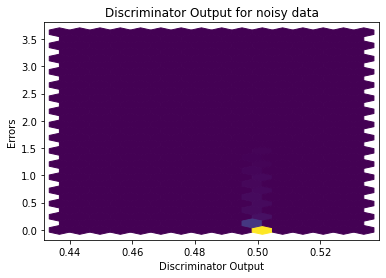

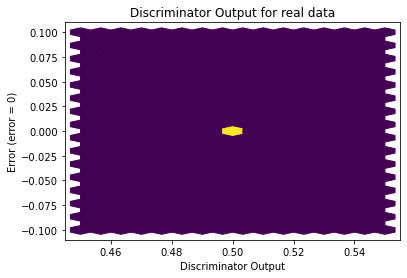

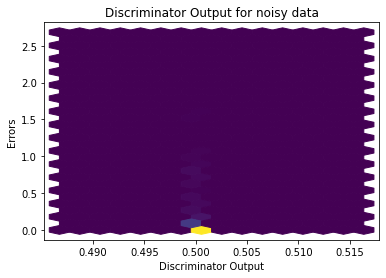

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0451]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0274]], requires_grad=True)
